=======================================================================================

# TP de Statistique Inférentielle 

# Version corrigée
=======================================================================================

Dans ce TP, on va effectuer des calculs de maximisation de vraisemblance sur des modèles simples


## Exemple de la loi normale

In [ ]:
## Récupération d'un jeu de données d'âge de 1000 étudiants d'une université parisienne, tirés au hasard

In [12]:
%matplotlib notebook
from download import download
import pandas as pd
import numpy as np
url = "http://www.lpsm.paris/pageperso/bousquet/yotta/data/age_students.csv"
path_target = "./age_students.csv"
download(url, path_target, replace=True)
data = pd.read_csv(path_target)

file_sizes: 100%|███████████████████████████| 4.00k/4.00k [00:00<00:00, 625kB/s]


Successfully downloaded file to ./age_students.csv


In [ ]:
# Représenter l'histogramme de ces données. Que vous inspire-t-il sur le choix d'une loi ? 

data.hist()

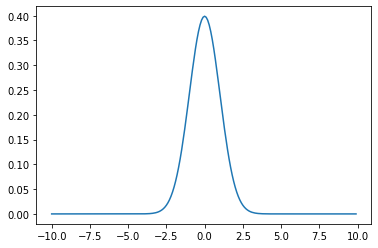

In [11]:
# Représenter plusieurs graphes de loi normale
from scipy.stats import norm 
import matplotlib.pyplot as plt

def loi_normale(x,mu = 0 ,sigma = 1):
    return norm.pdf(x,loc = mu, scale=sigma)

x = np.arange(-10,10,0.1)
y = loi_normale(x)
plt.plot(x,y)

In [ ]:
# Implémenter la fonction de log-vraisemblance de la loi normale 
# en créant une fonction "log-vraisemblance(data,mu,sigma)"

def log_vraisemblance(data,mu,sigma):
    L = [] #0.0
    for x in data["X"]:
        y =   loi_normale(x,mu = mu, sigma = sigma)
        #y = -((x-mu)**2.0)/(2*(sigma**2.0)) - 0.5*np.log(2*np.pi) - np.log(sigma)
        L.append(np.log(y))
        #L += np.log(y)
    return np.sum(L) # L#

# Test 
log_vraisemblance(data,24,10)

In [ ]:
# Représenter l'évolution de la log-vraisemblance en fonction de mu pour sigma connu, et inversement, et tester quelques choix

# Mu fixé
mu = 24
x = np.arange(1,5,0.1)
y = []
for sigma in x:
    y.append(log_vraisemblance(data,mu,sigma))

plt.figure()
plt.plot(x,y)
plt.show()

In [ ]:
# Sigma fixé
sigma = 2
x = np.arange(1,50,1)
y = []
for mu in x:
    y.append(log_vraisemblance(data,mu,sigma))

plt.figure()
plt.plot(x,y)
plt.show()

In [ ]:
# Définissez la fonction LogL(X) où X[0] = mu et X[1]=sigma

def LogL(X):
    mu = X[0]
    sigma = X[1]
    return log_vraisemblance(data,mu,sigma)

In [ ]:
# Cette procédure devrait vous permettre de tracer les lignes de niveau de la log-vraisemblance
aX0=np.linspace(10,30,100)
aX1=np.linspace(1,4,100)
Z=np.array([[LogL(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.figure(figsize=(10,10))
plt.contour(aX0,aX1,Z) #trace les lignes de niveaux de la fonction fa 
plt.title("Lignes de niveaux de la log-vraisemblance")
plt.axis("scaled")
plt.show()

In [ ]:
# En utilisant la procédure d'optimisation basique de SciPy (fonction "minimize"), et la fonction LogL, 
# peut-on produire un estimateur correct ?

from scipy.optimize import minimize

# Choix d'un point de départ
x0 = np.array([20,1.5])
res = minimize(LogL,x0, method='nelder-mead', options={'xatol':1e-8, 'disp':True})

print(res.x)

## Exemple de la loi exponentielle

 A partir de la fonction **numpy.random.exponential()**, produire une fonction qui :
 - simule M échantillons exponentiels x1,...xn de taille n et de paramètre theta=1/lambda = espérance de X
 - produit M estimateurs du maximum de vraisemblance
 - trace le comportement de ces estimateurs et vérifie l'accord entre l'intervalle de confiance empirique et les résultats théoriques asymptotiques

<IPython.core.display.Javascript object>


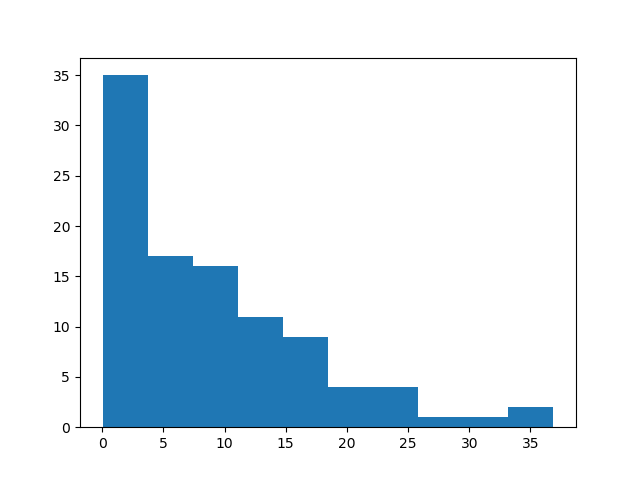

(array([35., 17., 16., 11.,  9.,  4.,  4.,  1.,  1.,  2.]),
 array([3.13090181e-02, 3.71694879e+00, 7.40258856e+00, 1.10882283e+01,
        1.47738681e+01, 1.84595079e+01, 2.21451476e+01, 2.58307874e+01,
        2.95164272e+01, 3.32020670e+01, 3.68877067e+01]),
 <a list of 10 Patch objects>)

In [15]:
# Simulation d'un échantillon (pour voir)
import numpy as np
theta = 10
x = np.random.exponential(theta,100)
plt.hist(x)

In [16]:
# Fonction qui calcule l'EMV en theta pour un échantillon exponentiel 

def compute_MLE(x): 
    n = len(x)
    theta = np.sum(x)/n
    return(theta)

In [17]:
compute_MLE(x) # Test

8.953145717432328

In [103]:
# Fonction qui trace l'évolution de l'EMV

def plot_evol_MLE(range_n=np.arange(2,5),M=30,theta=10):
    
    t = len(range_n)
    res = np.zeros((t,M))                             # tableau de résultats rempli de 0
    i=0
    for n in range_n:                              # boucle sur les tailles d'échantillon
        
        j=0
        for k in np.arange(1,M+1):                   # répétitions de simulation pour 1 seule taille
            x_cur = np.random.exponential(theta,n) # simulation d'un échantillon de taille n
            theta_cur = compute_MLE(x_cur)         # calcul du maximum de vraisemblance
            res[i,j]=theta_cur
            j+=1
        i+=1
    return res                                   # retourne une matrice t x M
 
# Calcul   
range_n=np.arange(2,100)
res = plot_evol_MLE(range_n=range_n,M=200) 
res.shape

(98, 200)

In [108]:
# Transformons les données en dataframe
df = pd.DataFrame(res).T                      # on transforme le tableau en une matrice M x t

# Calcul de la moyenne par valeur de taille n (donc par colonne)
EMV = df.apply("mean",axis=0)

# Calcul des quantiles extrêmes à 5% et 95% par valeur de taille n (donc par colonne) 
quant_inf_EMV = df.quantile(0.05)
quant_sup_EMV = df.quantile(0.95)

<IPython.core.display.Javascript object>


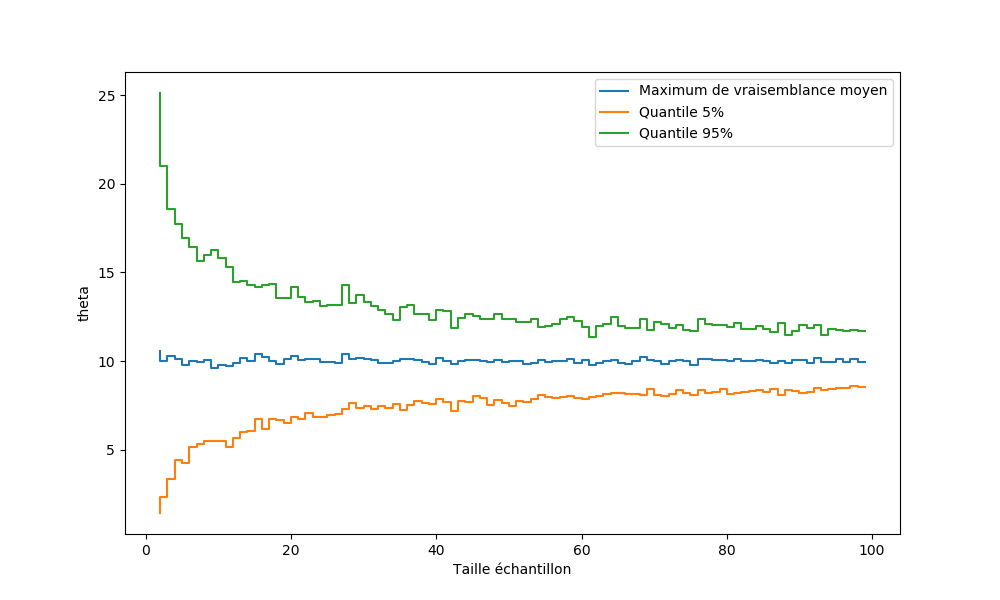

In [113]:
# Plot des courbes
figure = plt.figure(figsize = (10, 6))
plt.step(range_n,EMV,label="Maximum de vraisemblance moyen")
plt.step(range_n,quant_inf_EMV ,label="Quantile empirique 5%")
plt.step(range_n, quant_sup_EMV,label='Quantile empirique 95%')
plt.xlabel('Taille échantillon')
plt.ylabel('theta')
plt.legend()
plt.show()

### Calcul de l'intervalle de confiance lié au théorème de la limite centrale

Calculez les deux bornes de l'IC théorique correspondant et ajoutez-les sur le graphique


<IPython.core.display.Javascript object>


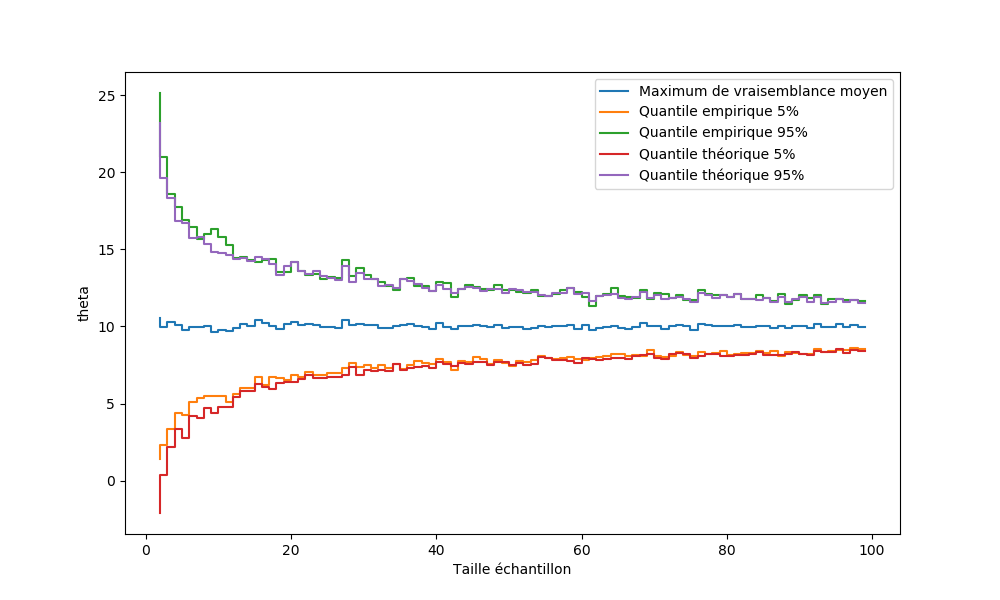

In [121]:
# Calcul des quantiles de la loi normale centrée réduite pour les seuils 5% et 95%
u_alpha = norm.ppf([0.05, 0.95])

# Estimation progressive de l'écart-type de l'EMV
std = df.apply("std",axis=0)

borne_min = EMV + u_alpha[0]*std
borne_max = EMV + u_alpha[1]*std

# Plot des courbes
figure = plt.figure(figsize = (10, 6))
plt.step(range_n,EMV,label="Maximum de vraisemblance moyen")
plt.step(range_n,quant_inf_EMV ,label="Quantile empirique 5%")
plt.step(range_n, quant_sup_EMV,label='Quantile empirique 95%')
plt.step(range_n,borne_min ,label="Quantile théorique 5%")
plt.step(range_n, borne_max,label='Quantile théorique 95%')
plt.xlabel('Taille échantillon')
plt.ylabel('theta')
plt.legend()
plt.show()

### Vérification de la gaussianité de la distribution de l'EMV

Ecrivez une fonction qui vérifie graphiquement la gaussianité de la distribution de l'EMV pour une valeur de n

<IPython.core.display.Javascript object>


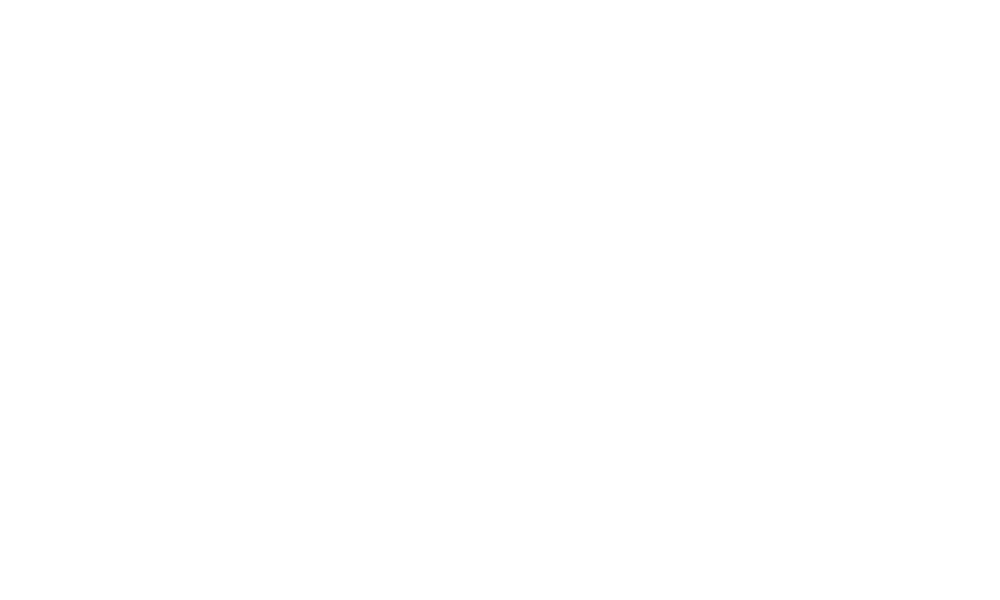

<IPython.core.display.Javascript object>


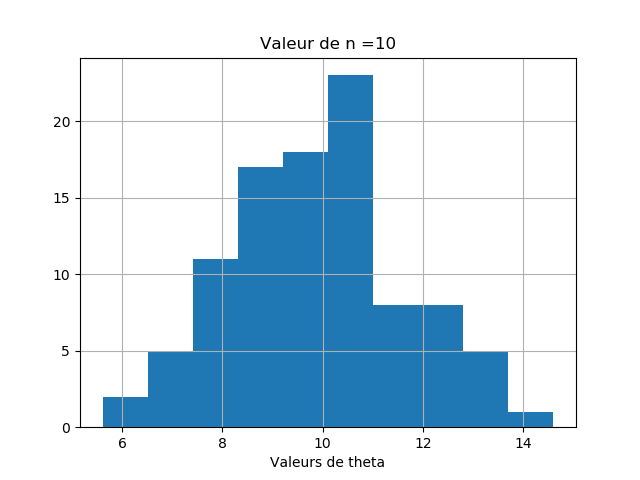

In [194]:
import scipy.stats as stats
import pylab

def check_EMV_1(n):   # on plotte ici l'histogramme
    
    x = df[n-1:n:]
    
    figure = plt.figure(figsize = (10, 6))
    x.T.hist()
    plt.xlabel('Valeurs de theta')
    plt.title("Valeur de n ="+str(n))
    plt.show()    
    
  # Test 1  
check_EMV_1(10)
    
